In [1]:
import torch
from torch import optim
from lsp import *

In [320]:
N = 5
S = torch.randn(N, 2, requires_grad=True)
len_S = torch.tensor([N])
G = torch.randn(N, 2, requires_grad=True)
len_G = torch.tensor([N])
Y = torch.randn(N, 2)

opt = optim.SGD([S, G], lr=1)

loss_fn = LSPLoss('gcr', w_loss_gs=1, w_loss_sg=0.1, d=0.1)

In [321]:
import matplotlib.pyplot as plt

0.0019248614553362131


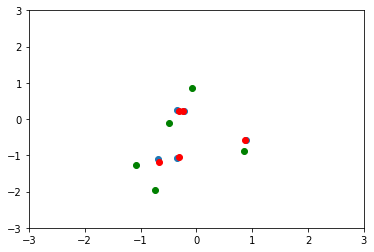

In [326]:
ret = loss_fn.forward(G, len_G, S, len_S)
total_loss = F.mse_loss(ret.S_pi, Y) + ret.loss
opt.zero_grad()
total_loss.backward()
print(ret.loss.item())
opt.step()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
with torch.no_grad():
    plt.scatter(S[:, 0], S[:, 1])
    plt.scatter(G[:, 0], G[:, 1], c='red')
    plt.scatter(Y[:, 0], Y[:, 1], c='green')